# Задание 5


## 1. Постоянный шаг. Метод РК (классический 4-х стадийный)

In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x_0 = 0.994
y_0 = 0
u_0 = 0
v_0 = -2.00158510637908252240537862224
T   = 17.0652165601579625588917206249
mu = 0.012277471
eta = 1 - mu

In [7]:
def A(x, y):
    return sqrt(((x + mu) ** 2 + y ** 2) ** 3)

def B(x, y):
    return sqrt(((x - eta) ** 2 + y ** 2) ** 3)

def f(x, u, y, v):
    return u

def g(x, u, y, v):
    return x + 2 * v - eta * (x + mu) / A(x, y) - mu * (x - eta) / B(x, y)

def h(x, u, y, v):
    return v

def p(x, u, y, v):
    return y - 2 * u - eta * y / A(x, y) - mu * y / B(x, y)

In [55]:
# классический 4-х стадийный метод Рунге-Кутты
def ODE(t_grid, tau, x_0, u_0, y_0, v_0, i_check):
    x_check = []
    u_check = []
    y_check = []
    v_check = []

    x_n = x_0
    u_n = u_0
    y_n = y_0
    v_n = v_0
    for i in range(len(t_grid) - 1):
        # добавляем в точки
        if i % i_check == 0:
            x_check.append(x_n)
            u_check.append(u_n)
            y_check.append(y_n)
            v_check.append(v_n)

        k1 = f(x_n, u_n, y_n, v_n)
        m1 = g(x_n, u_n, y_n, v_n)
        l1 = h(x_n, u_n, y_n, v_n)
        s1 = p(x_n, u_n, y_n, v_n)

        k2 = f(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        m2 = g(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        l2 = h(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)
        s2 = p(x_n + tau / 2 * k1, u_n + tau / 2 * m1, y_n + tau / 2 * l1, v_n + tau / 2 * s1)

        k3 = f(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        m3 = g(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        l3 = h(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)
        s3 = p(x_n + tau / 2 * k2, u_n + tau / 2 * m2, y_n + tau / 2 * l2, v_n + tau / 2 * s2)

        k4 = f(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        m4 = g(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        l4 = h(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)
        s4 = p(x_n + tau * k3, u_n + tau * m3, y_n + tau * l3, v_n + tau * s3)

        # значения в следующей точке
        x_n = x_n + tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        u_n = u_n + tau / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        y_n = y_n + tau / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        v_n = v_n + tau / 6 * (s1 + 2 * s2 + 2 * s3 + s4)
        
    return x_check, u_check, y_check, v_check

In [64]:
T_num = 6
t_start = 0
t_end   = T_num * T

N_degree = 7
N = 10 ** N_degree + 1

i_check_degree = 3
i_check = 10 ** i_check_degree  # каждую 1000-ю точку сохраняем для графика

t_grid, tau = np.linspace(t_start, t_end, N, retstep=True)
x_check, _, y_check, _ = ODE(t_grid, tau, x_0, u_0, y_0, v_0, i_check)


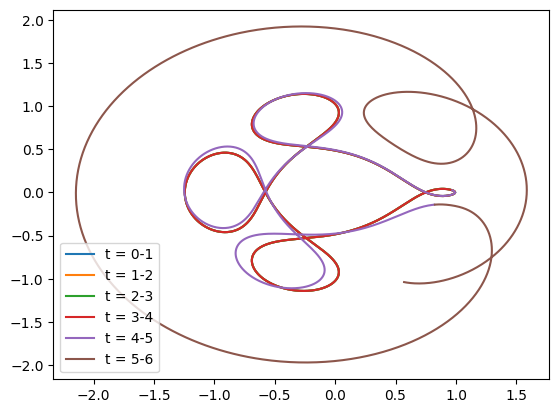

In [65]:
x_check_T = []
y_check_T = []
for i in range(T_num):
    N_start = 10 ** (N_degree - i_check_degree) // T_num * i
    N_end = 10 ** (N_degree - i_check_degree) // T_num * (i + 1)
    x_check_T.append(x_check[N_start:N_end])
    y_check_T.append(y_check[N_start:N_end])
    plt.plot(x_check[N_start:N_end], y_check[N_start:N_end], label=f"t = {i}-{i + 1}")
plt.legend()

**Идеи для улучшения**\
можно задавать количество точек на период, и переписать код так, чтобы ODE возвращала значения в последней точке. Тогда можно посчитать один период, построить график, затем при необходимости продолжить считать соедующий период, задав в качестве начальных значений последние значения, которые были возвращены функцией.Так не будем пересчитывать заново, если хотим посчитать следующий период,

## Переменный шаг. Метод Дормана-Принса 4(5)

In [ ]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задаем то, что относится к задаче

In [ ]:
x_0 = 0.994
y_0 = 0
u_0 = 0
v_0 = -2.00158510637908252240537862224
T   = 17.0652165601579625588917206249
mu = 0.012277471
eta = 1 - mu

In [ ]:
def A(x, y):
    return sqrt(((x + mu) ** 2 + y ** 2) ** 3)

def B(x, y):
    return sqrt(((x - eta) ** 2 + y ** 2) ** 3)

def f(t, x, u, y, v):
    return u

def g(t, x, u, y, v):
    return x + 2 * v - eta * (x + mu) / A(x, y) - mu * (x - eta) / B(x, y)

def h(t, x, u, y, v):
    return v

def p(t, x, u, y, v):
    return y - 2 * u - eta * y / A(x, y) - mu * y / B(x, y)

Задаем метод Дормана-Принса

In [ ]:
c_DP = [0, 1/5, 3/10, 4/5, 8/9, 1, 1]
b1_DP = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]
b2_DP = [5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40]
A_DP = [
    [0, 0, 0, 0, 0 , 0, 0],
    [1/5, 0, 0, 0, 0 , 0, 0],
    [3/40, 9/40, 0, 0, 0 , 0, 0],
    [44/45, -56/15, 32/9, 0, 0 , 0, 0],
    [19372/6561, -25360/2187, 64448/6561, -212/729, 0 , 0, 0],
    [9017/3168, -355/33, 46732/5247, 49/176, -5163/18656 , 0, 0],
    [35/384, 0, 500/1113, 125/192, -2187/6784 , 11/84, 0]
]

In [66]:
def ODE_DP45(t_start, t_end, x_0, u_0, y_0, v_0, i_check):
    x_check = []
    u_check = []
    y_check = []
    v_check = []

    x_n = x_0
    u_n = u_0
    y_n = y_0
    v_n = v_0
    for i in range(len(t_grid) - 1):
        t_n = t_grid[i]
        # добавляем в точки
        if i % i_check == 0:
            x_check.append(x_n)
            u_check.append(u_n)
            y_check.append(y_n)
            v_check.append(v_n)

        k = [None] * 7
        m = [None] * 7
        l = [None] * 7
        s = [None] * 7
        for i in range(7):
            t_i = t_n + c_DP[i] * tau
            x_i = x_n
            u_i = u_n
            y_i = u_n
            v_i = v_n
            for j in range(i):
                x_i += k[j] * A_DP[i][j] * tau
                u_i += m[j] * A_DP[i][j] * tau
                y_i += l[j] * A_DP[i][j] * tau
                v_i += s[j] * A_DP[i][j] * tau
            k[i] = f(t_i, x_i, u_i, y_i, v_i)
            m[i] = g(t_i, x_i, u_i, y_i, v_i)
            l[i] = h(t_i, x_i, u_i, y_i, v_i)
            s[i] = p(t_i, x_i, u_i, y_i, v_i)
        
        
        # значения в следующей точке
        
        
    return x_check, u_check, y_check, v_check

SyntaxError: invalid syntax (2157282969.py, line 34)